### Online Learning with Beta-binomial conjugation ###
Suppose we have binomial function which has m head in N trials with the chance of head p, P(m|N,p).
Then we pick a prior which is beta distribution with two parameter a  and b,$\beta(p|a,b)$.
$$
\begin{align}
\because P(p|m)
&=\frac{P(m|N,p)*\beta(p|a,b)}{\int_0^1 P(m|N,p)*\beta(p|a,b)dp} ,\text{denominator is a normalization factor}\\
&=\frac{\binom{N}{m} p^m (1-p)^{N-m} p^{a-1} (1-p)^{b-1} \frac{1}{\beta (a,b)}}{\int_0^1 \binom{N}{m} p^m (1-p)^{N-m} p^{a-1} (1-p)^{b-1} \frac{1}{\beta (a,b)} dp }\\
&=\frac{\binom{N}{m}p^{m+a-1}(1-p)^{N-m+b-1}\frac{1}{\beta (a,b)}}{\int_0^1 \binom{N}{m}p^{m+a-1}(1-p)^{N-m+b-1}\frac{1}{\beta (a,b)}dp} \\
&=\frac{p^{m+a-1}(1-p)^{N-m+b-1}}{\int_0^1 p^{m+a-1}(1-p)^{N-m+b-1}dp}\\
&=\frac{p^{m+a-1}(1-p)^{N-m+b-1}}{\beta(m+a,N-m+b)}\\
&=\beta(p|m+a,N-m+b)
\end{align}
$$
$\therefore P(m|N,p)*\beta(p|a,b) \propto \beta(p|m+a,N-m+b)$

In [1]:
def Beta(p,a,b):
    return (p**(a-1))*((1-p)**(b-1))*(factorial(a+b-1)/(factorial(a-1)*factorial(b-1)))

In [2]:
def Binomial(p,m,N):
    return (factorial(N)/(factorial(m)*factorial(N-m)))*(p**m)*((1-p)**(N-m))

In [3]:
def ShowOnlineLearning(fig,axs,case,p,m,N,a,b):
    #create data points
    nData=100
    data_x=np.linspace(0,1,nData) #create 100 data points whose value is between 0 and 1

    #draw prior
    if a>0 and b>0:
        data_y=np.zeros(0)
        for i in range(nData):
            data_y=np.append(data_y,Beta(data_x[i],a,b))
        axs[case-1,0].plot(data_x,data_y)
    axs[case-1,0].set_title('Prior: a={} b={}'.format(a,b))
    
    #draw likelihood
    data_y=np.zeros(0)
    for i in range(nData):
        data_y=np.append(data_y,Binomial(data_x[i],m,N))
    axs[case-1,1].plot(data_x,data_y)
    axs[case-1,1].set_title('Likelihood: m={} N={}'.format(m,N))

    #draw posterior
    data_y=np.zeros(0)
    for i in range(nData):
        data_y=np.append(data_y,Beta(data_x[i],a+m,b+N-m))
    axs[case-1,2].plot(data_x,data_y)
    axs[case-1,2].set_title('Posterior: a={} b={}'.format(a+m,b+N-m))

path:  ./dataset/testfile.txt
a:  10
b:  1


case 1: 0101010101001011010101
Likelihood: 0.16818809509277344
Beta posterior: a=21 b=12
case 2: 0110101
Likelihood: 0.29375515303997485
Beta posterior: a=25 b=15
case 3: 010110101101
Likelihood: 0.2286054241794335
Beta posterior: a=32 b=20
case 4: 0101101011101011010
Likelihood: 0.18286870706509092
Beta posterior: a=43 b=28
case 5: 111101100011110
Likelihood: 0.2143070548857833
Beta posterior: a=53 b=33
case 6: 101110111000110
Likelihood: 0.20659760529408
Beta posterior: a=62 b=39
case 7: 1010010111
Likelihood: 0.25082265600000003
Beta posterior: a=68 b=43
case 8: 11101110110
Likelihood: 0.2619678932864457
Beta posterior: a=76 b=46
case 9: 01000111101
Likelihood: 0.23609128871506807
Beta posterior: a=82 b=51
case 10: 110100111
Likelihood: 0.27312909617436365
Beta posterior: a=88 b=54
case 11: 01101010111
Likelihood: 0.24384881449471862
Beta posterior: a=95 b=58


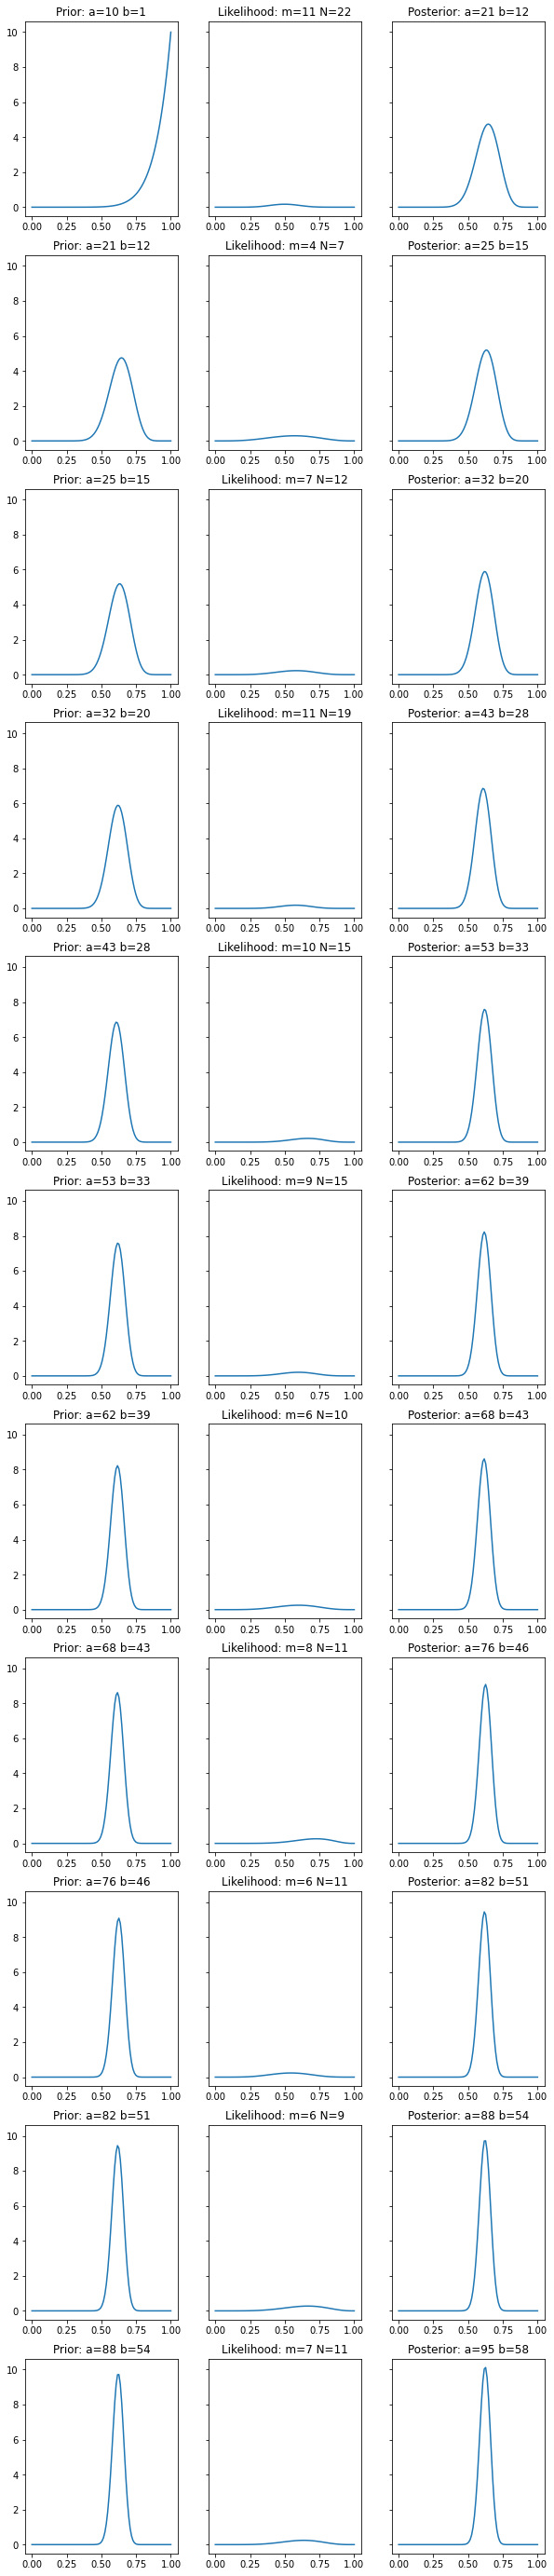

In [5]:
import os
from math import factorial
import numpy as np
import matplotlib.pyplot as plt

if __name__=='__main__':
    path=input("path: ") #./dataset/testfile.txt
    fin=open(path,"r")
    case=0
    nCase=0
    while True:
        line=fin.readline()
        if line=="": #EOF
            break
        nCase+=1
    fin.seek(0,0)
    #initial beta prior
    a=int(input("a: "))
    b=int(input("b: "))
    #initial figure
    fig, axs = plt.subplots(nCase, 3, figsize=(10,50), sharey=True)
    
    #online learning
    while True:
        #in # case, read binary outcomes
        case+=1
        line=fin.readline()
        if line=="": #EOF
            break
        m=line.count('1') #amount of head
        N=len(line)-1 #amount of coin tossing times; cut one element, \n
        p=m/N #probability of head
        print("case {}: {}".format(case,line),end="") #print outcomes' information
        
        
        #likelihood
        likelihood=Binomial(p,m,N) #binomial likelihood
        print("Likelihood: {}".format(likelihood)) #print binomial likelihood information
        
        ShowOnlineLearning(fig,axs,case,p,m,N,a,b)
        
        #posterior: this times' beta posterior is also next times' beta prior
        a+=m #posterior's parameter a
        b+=N-m #posterior's parameter b
        print('Beta posterior: a={} b={}'.format(a,b)) #print beta posterior information
        
    fin.close()
    